In [59]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
import numpy as np

In [2]:
data_fld = "riiid-test-answer-prediction"

In [3]:
train_orig = pd.read_csv(os.path.join(data_fld, "train.csv"))
train = train_orig.copy()

lectures_orig = pd.read_csv(os.path.join(data_fld, "lectures.csv"))
lectures = lectures_orig.copy()

questions_orig = pd.read_csv(os.path.join(data_fld, "questions.csv"))
questions = questions_orig.copy()

# Train

In [4]:
train.columns

Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [6]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [7]:
train.describe(include=["object", "bool"])

,prior_question_had_explanation
count,100837826
unique,2
top,True
freq,89685560


In [8]:
train.size

1012303320

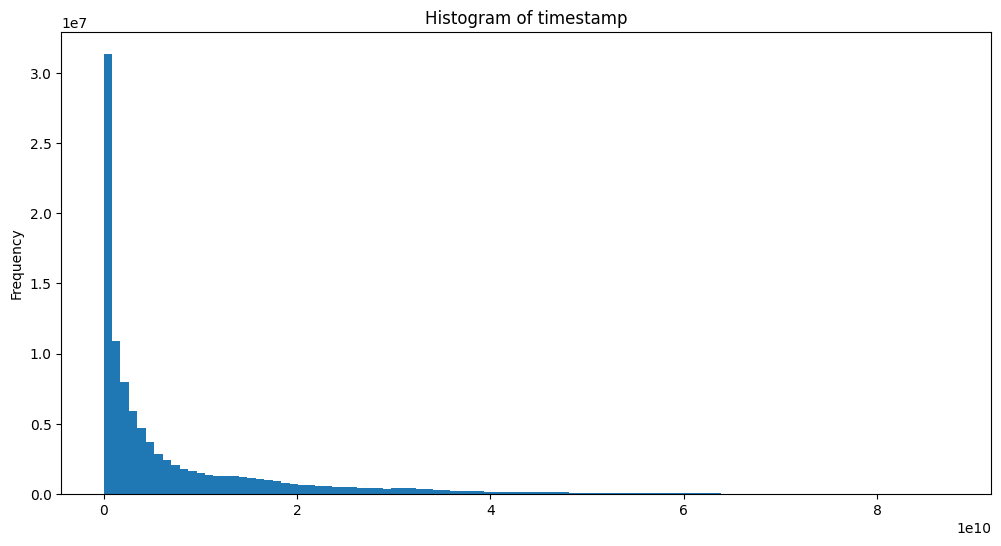

In [9]:
fig = plt.figure(figsize=(12,6))
train['timestamp'].plot.hist(bins=100)
plt.title("Histogram of timestamp")
plt.xticks(rotation=0)
plt.show()

In [10]:
train["user_id"].nunique()

393656

In [11]:
train.content_id.value_counts()[:10]

6116    213605
6173    202106
4120    199372
175     195861
7876    190170
7900    180858
2064    176043
2063    176043
2065    176043
4492    173769
Name: content_id, dtype: int64

Text(0, 0.5, 'Count')

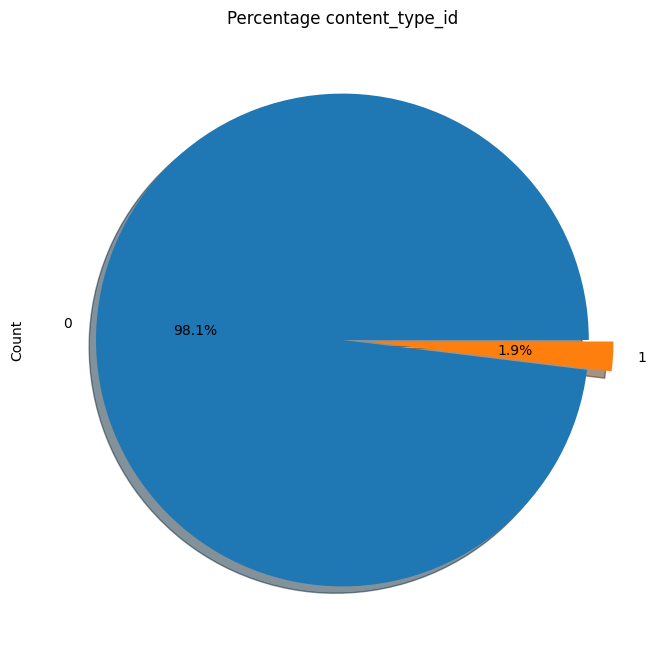

In [12]:
f, ax = plt.subplots(figsize=(18, 8))
train["content_type_id"].value_counts().plot.pie(
    explode=[0, 0.1], autopct="%1.1f%%", ax=ax, shadow=True
)
ax.set_title("Percentage content_type_id")
ax.set_ylabel("Count")

# Lectures

In [13]:
lectures.size

1672

In [14]:
lectures.columns

Index(['lecture_id', 'tag', 'part', 'type_of'], dtype='object')

In [15]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [16]:
lectures.describe(include=["object", "bool"])

,type_of
count,418
unique,4
top,concept
freq,222


In [17]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [18]:
lectures["type_of"].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

Text(0, 0.5, 'Types')

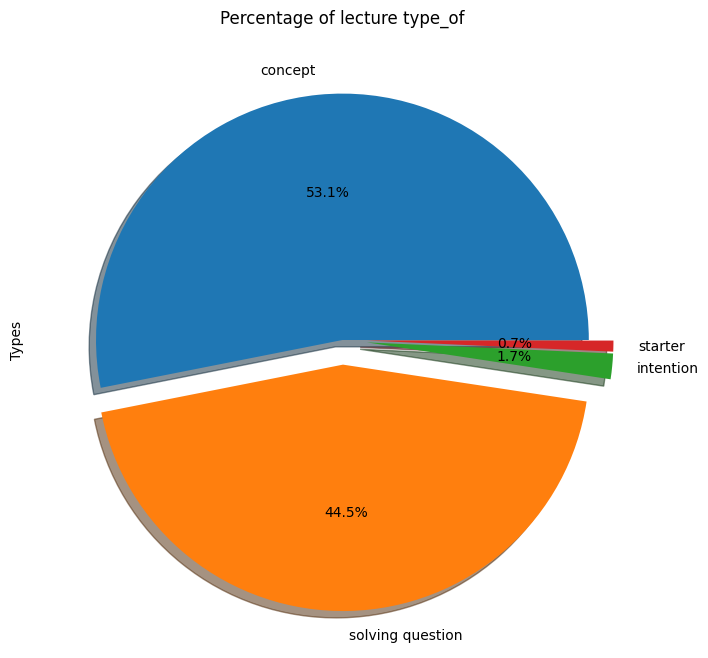

In [19]:
f, ax = plt.subplots(figsize=(18, 8))
lectures["type_of"].value_counts().plot.pie(
    explode=[0, 0.1, 0.1, 0.1], autopct="%1.1f%%", ax=ax, shadow=True
)
ax.set_title("Percentage of lecture type_of")
ax.set_ylabel("Types")

In [20]:
lectures.tag.value_counts()

136    7
27     6
161    6
74     6
134    6
      ..
90     1
112    1
31     1
138    1
2      1
Name: tag, Length: 151, dtype: int64

<AxesSubplot:>

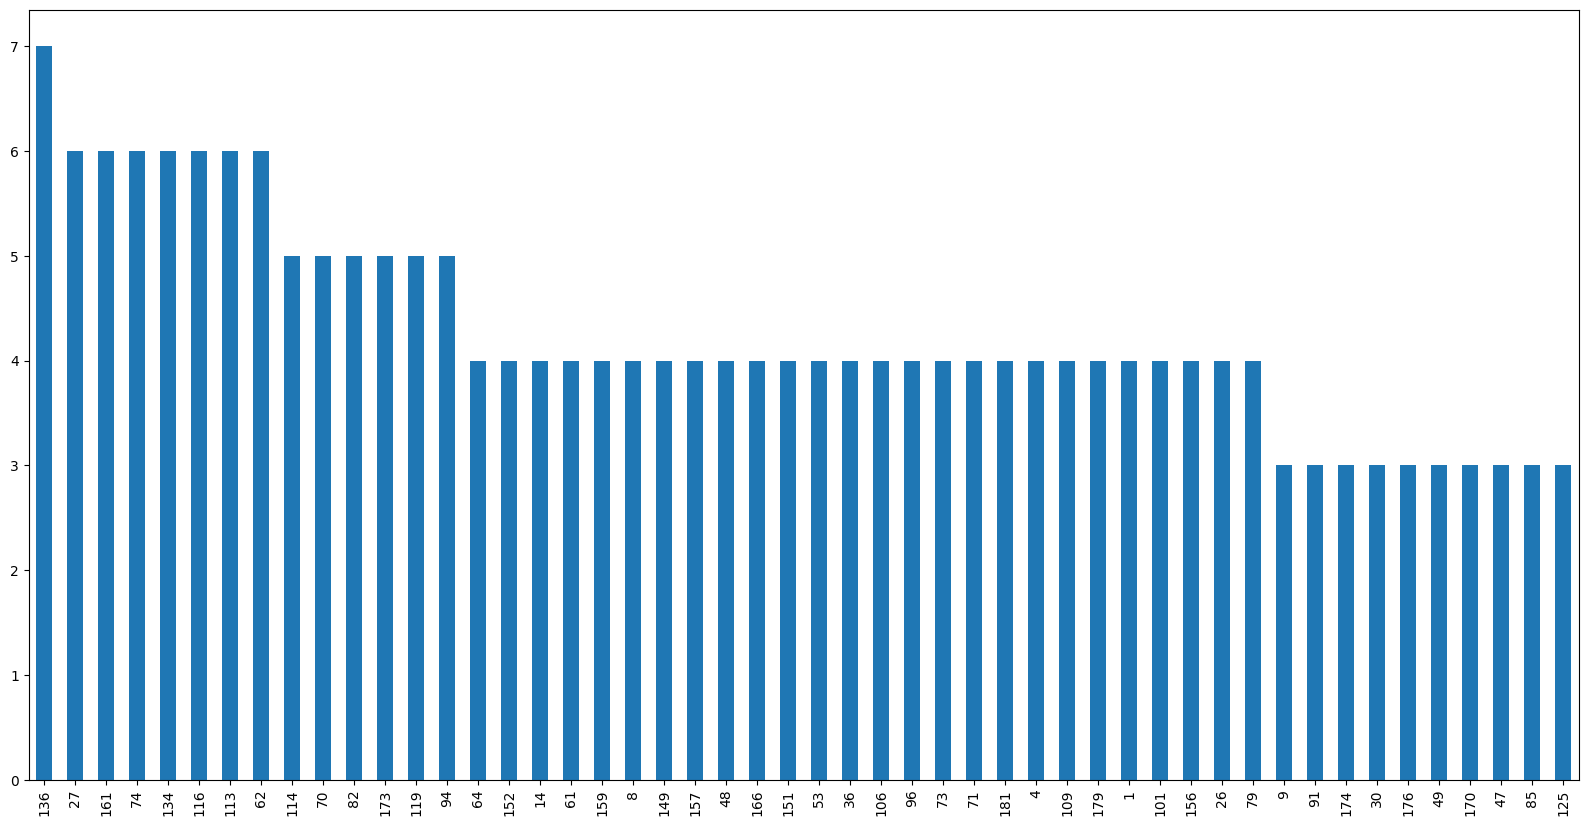

In [21]:
f, ax = plt.subplots(figsize=(20, 10))
lectures.tag.value_counts()[:50].plot(kind='bar')

# Questions

In [22]:
questions.size

67615

In [23]:
questions.columns

Index(['question_id', 'bundle_id', 'correct_answer', 'part', 'tags'], dtype='object')

In [24]:
questions.bundle_id.nunique()

9765

In [25]:
questions.tags.nunique()

1519

In [26]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [27]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [28]:
questions.describe(include=["object", "bool"])

,tags
count,13522
unique,1519
top,8
freq,738


<AxesSubplot:>

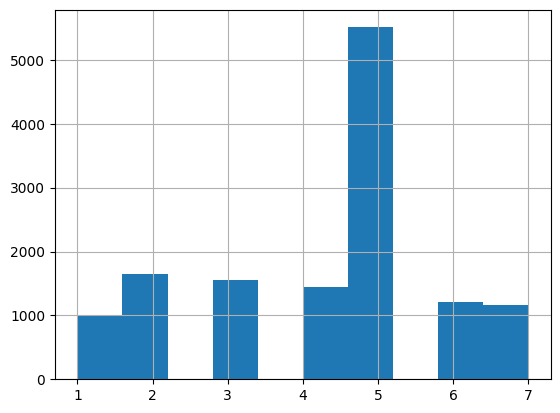

In [29]:
questions['part'].hist() 

# Group by user id and calculate statistics

In [54]:
def get_avg_non_negative(x):
    n = 0
    s = 0
    for item in x:
        if item >= 0:
            s += item
            n += 1
    return s / n

In [55]:
# avg score per user
avg_score_by_user = train.groupby(by=["user_id"], group_keys=True)[
    "answered_correctly"
].apply(lambda r: get_avg_non_negative(r))

<AxesSubplot:>

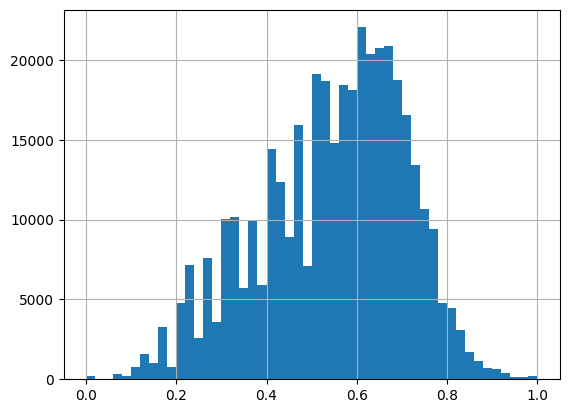

In [56]:
avg_score_by_user.hist(bins=50)

In [48]:
n_lectures_by_user = train.groupby('user_id').agg({'content_type_id': ['sum']})

In [49]:
n_lectures_by_user

,content_type_id
,sum
user_id,
115,0
124,0
2746,1
5382,3
8623,3
...,...
2147470770,2
2147470777,6


In [34]:
train.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,average_score
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True,0.555556
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True,0.555556
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True,0.555556
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True,0.555556
101230331,101230331,428692118,2147482888,7995,0,26,3,1,29000.0,True,0.555556


In [35]:
train = pd.merge(
    train, questions, left_on="content_id", right_on="question_id", how="left"
)

In [36]:
train.columns

Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'average_score', 'question_id', 'bundle_id', 'correct_answer', 'part',
       'tags'],
      dtype='object')

In [37]:
n_answers_by_question_part = train.pivot_table(
    index=["answered_correctly"], columns="part", aggfunc="size", fill_value=0
)

In [38]:
n_answers_by_question_part

part,1.0,2.0,3.0,4.0,5.0,6.0,7.0
answered_correctly,,,,,,,
-1,98838,74687,77543,109541,291620,92058,22938
0,1900674,5460065,2579393,2976992,15950583,3471909,1687057
1,5553896,13283339,6060514,5090684,24957570,7029563,3269061
